In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.viz import circular_layout, plot_connectivity_circle
from mne.minimum_norm import (apply_inverse, apply_inverse_epochs,
                              read_inverse_operator)
from mne.connectivity import seed_target_indices, spectral_connectivity
from mne.preprocessing import run_ica

In [70]:
raw = mne.io.read_raw_eeglab('Exp2.set')  # load data  
events=mne.find_events(raw)
#events=mne.read_events('exp4-eve.csv')
#print mne.find_events(raw)
#print events
event_id = {' 960': 960, ' 7': 7, ' 8': 8,
            ' 9': 9, ' 131': 131, ' 132': 132, ' 133': 133, ' 134': 134, ' 136': 136, 
            ' 137': 137, ' 139': 139, ' 1310': 1310, ' 1311': 1311,
            ' 9100': 9100, ' 991': 991, ' 955': 955, '9115':9115}
#eog=mne.Epochs(raw, events,event_id, 7, 0, 20, baseline=(None, 0))


Reading Exp2.fdt
24 events found
Events id: [   7    8    9  131  132  133  134  136  137  139  955  960  991 1310 1311
 9100]


In [32]:


raw = mne.io.read_raw_eeglab('Exp1_annotated.set')  # load data  
events=mne.find_events(raw)
#raw= raw.drop_channels()
#events = mne.read_events('Experiment 1_Tu18_7_11_12_annotations.txt')
#epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,baseline=(None, 0), reject=dict(mag=4e-12, grad=4000e-13, eog=150e-6))
"""ica=run_ica(raw, n_components=1, max_pca_components=63, n_pca_components=63, noise_cov=None, 
    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, 
    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, 
    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)"""


Reading Exp1_annotated.fdt
38 events found
Events id: [   7    8    9   15  131  132  133  134  136  137  139  960  991 1310 1311
 9100 9115]


'ica=run_ica(raw, n_components=1, max_pca_components=63, n_pca_components=63, noise_cov=None, \n    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, \n    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, \n    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)'

In [51]:
ica.plot_components() 


RuntimeError: Channel names are not unique, found duplicates for: set([u'1', u'2'])

In [50]:
ica=run_ica(raw, n_components=1, max_pca_components=25, n_pca_components=25, noise_cov=None, 
    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, 
    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, 
    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)
#ica.plot_components() 
#ica.plot_properties(raw, picks=0, psd_args={'fmax': 35.})

Fitting ICA to data using 64 channels. 
Please be patient, this may take some time
Selection by number: 1 components
<ICA  |  raw data decomposition, fit (fastica): 5115904 samples, 1 components, channels used: "eeg">
    Now searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    0, 0, 0
    Removing duplicate indices...
Ready.


In [71]:
label_names = raw.ch_names
#print label_names[:31]
#print label_names[31:63]

label_con=mne.connectivity.seed_target_indices(np.arange(0,31), np.arange(31,63))

In [72]:
#rest epochs
"""raw.info['bads'] += ['STI 014']
picks_meg = mne.pick_types(raw.info, meg=False, eeg=True, eog=False,
                           stim=False, exclude='bads')"""
#raw.drop_channels(['STI 014'])

eog=mne.Epochs(raw, events,  7, 0, 20, baseline=(None, 0))
emg=mne.Epochs(raw, events, 8, 0, 20, baseline=(None, 0))
noise=mne.epochs.concatenate_epochs([eog,emg])
rest = mne.Epochs(raw, events, 9, 0, 15, baseline=(None, 0))

#rest1= mne.Epochs(raw, events, 960, 0, 40 )
#buf2= mne.Epochs(raw, events, 960, 15, 30 )
#buf3= mne.Epochs(raw, events, 960, 30, 45 )
#buf4= mne.Epochs(raw, events, 960, 45, 60)
#rest1=mne.epochs.concatenate_epochs([buf1,buf2,buf3,buf4])
#rest1= mne.Epochs(raw, events, 960, 0, 60 )

rest2= mne.Epochs(raw, events, 955, 0, 40, baseline=(None, 0))
rest3= mne.Epochs(raw, events, 9100, 0, 40, baseline=(None, 0))
rest4= mne.Epochs(raw, events, 991, 0, 40, baseline=(None, 0))
neutral=mne.epochs.concatenate_epochs([rest2,rest3,rest4])


stim1 = mne.Epochs(raw, events, 131, 0, 40, baseline=(None, 0))
stim2 = mne.Epochs(raw, events, 132, 0, 40, baseline=(None, 0))
stim3 = mne.Epochs(raw, events, 133, 0, 40, baseline=(None, 0))
stim4 = mne.Epochs(raw, events, 134, 0, 40, baseline=(None, 0))

stim5 = mne.Epochs(raw, events, 136, 0, 40, baseline=(None, 0))
stim6 = mne.Epochs(raw, events, 137, 0, 40, baseline=(None, 0))

stim7 = mne.Epochs(raw, events, 139, 0, 40, baseline=(None, 0))
stim8 = mne.Epochs(raw, events, 1310, 0, 40, baseline=(None, 0))
stim9 = mne.Epochs(raw, events, 1311, 0, 40, baseline=(None, 0))
stim=mne.epochs.concatenate_epochs([stim1,stim2,stim3,stim4,stim5,stim6,stim7,stim8,stim9])



1 matching events found
0 projection items activated
1 matching events found
0 projection items activated
Loading data for 1 events and 40961 original time points ...
0 bad epochs dropped
Loading data for 1 events and 40961 original time points ...
0 bad epochs dropped
2 matching events found
0 bad epochs dropped
9 matching events found
0 projection items activated
1 matching events found
0 projection items activated
1 matching events found
0 projection items activated
1 matching events found
0 projection items activated
Loading data for 1 events and 81921 original time points ...
0 bad epochs dropped
Loading data for 1 events and 81921 original time points ...
0 bad epochs dropped
Loading data for 1 events and 81921 original time points ...
0 bad epochs dropped
3 matching events found
0 bad epochs dropped
1 matching events found
0 projection items activated
1 matching events found
0 projection items activated
1 matching events found
0 projection items activated
1 matching events found

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..15.000s for estimation (30721 points)
    frequencies: 0.7Hz..48.4Hz (66 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    3.6s remaining:   12.9s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    4.2s remaining:    5.3s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    4.9s remaining:    2.4s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    5.5s finished


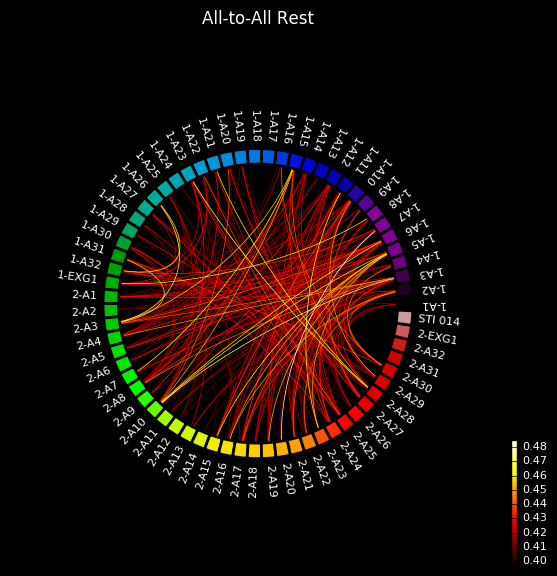

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 0.3Hz..48.9Hz (178 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..3
[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=24)]: Done   3 out of   3 | elapsed:    4.0s finished


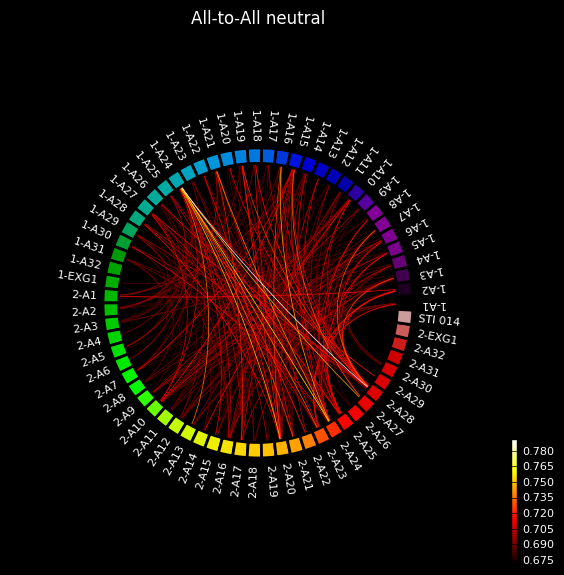

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 0.3Hz..48.9Hz (178 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    3.8s remaining:   13.4s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    4.8s remaining:    6.0s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    5.7s remaining:    2.8s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    6.9s finished


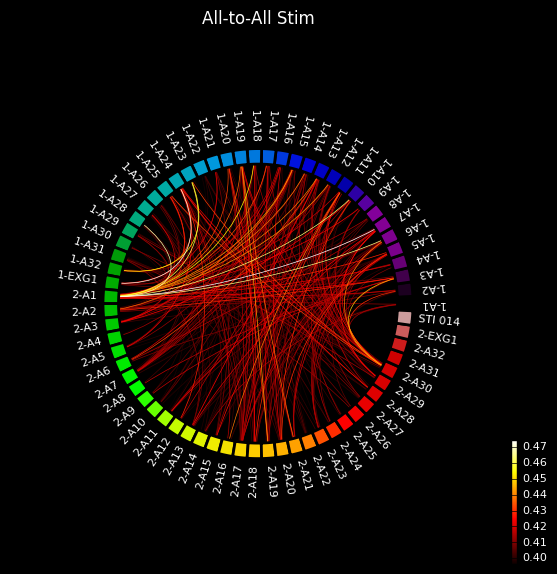

(<matplotlib.figure.Figure at 0xbf5a400>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x18562e80>)

In [73]:
coh1, freqs1, times, n_epochs, n_tapers = spectral_connectivity(rest, indices=label_con, method='wpli', mode='fourier', fmax=49,fskip=10, faverage=True,block_size=120000, n_jobs=24)


conmat1 = coh1[ :, 0]
plot_connectivity_circle(conmat1, label_names,indices=label_con, n_lines=300,linewidth=.5,title='All-to-All Rest')

coh2, freqs2, times, n_epochs, n_tapers = spectral_connectivity(neutral, indices=label_con, method='wpli', mode='fourier', fmax=49,fskip=10, faverage=True,block_size=120000, n_jobs=24)

conmat2 = coh2[ :, 0]
plot_connectivity_circle(conmat2, label_names,indices=label_con, n_lines=300,linewidth=.5,title='All-to-All neutral')

coh3, freqs3, times, n_epochs, n_tapers = spectral_connectivity(stim, indices=label_con, method='wpli', mode='fourier', fmax=49,fskip=10, faverage=True,block_size=120000, n_jobs=24)

conmat3 = coh3[ :, 0]
plot_connectivity_circle(conmat3, label_names,indices=label_con, n_lines=300,linewidth=.5,title='All-to-All Stim')

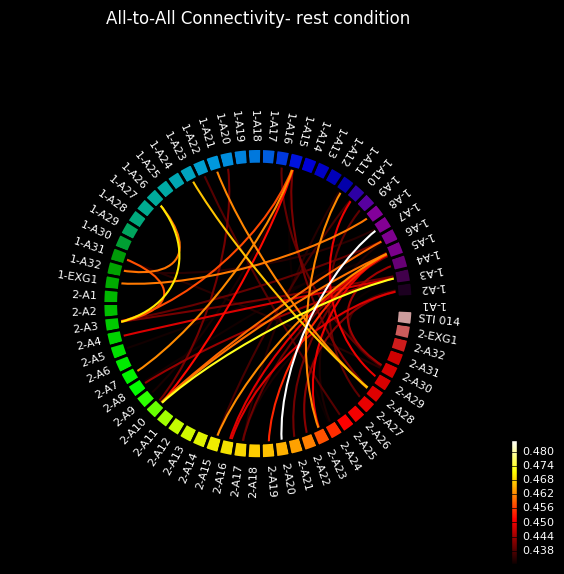

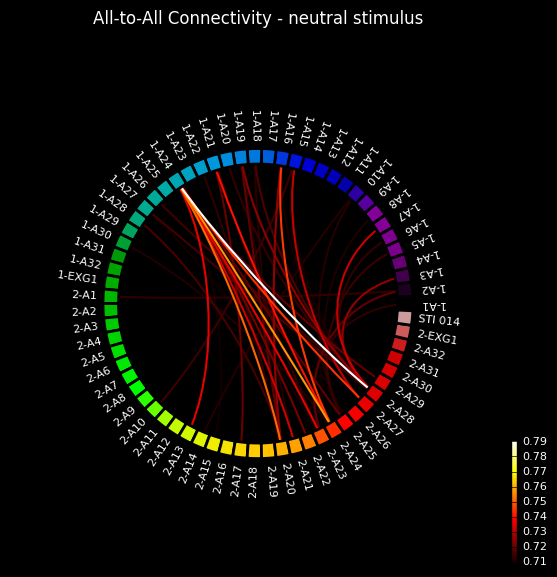

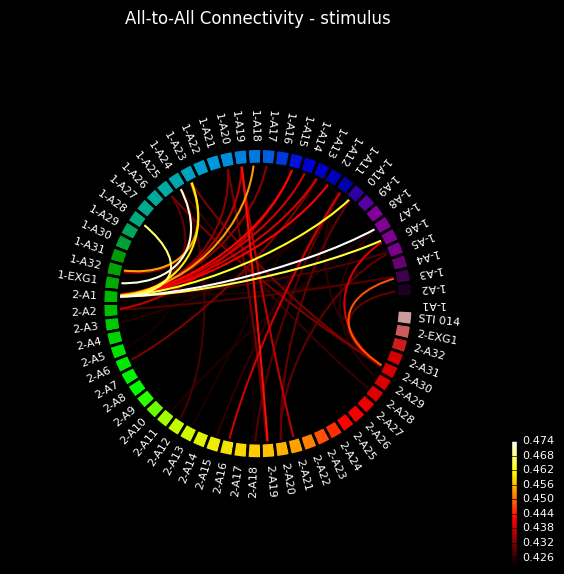

In [74]:
plot_connectivity_circle(conmat1, label_names,indices=label_con, n_lines=45,linewidth=1.5,title='All-to-All Connectivity- rest condition')
plt.savefig('Exp1_rest.png', facecolor='black')
plot_connectivity_circle(conmat2, label_names,indices=label_con, n_lines=45,linewidth=1.5,title='All-to-All Connectivity - neutral stimulus')
plt.savefig('Exp1_circle.png', facecolor='black')
plot_connectivity_circle(conmat3, label_names,indices=label_con, n_lines=45,linewidth=1.5,title='All-to-All Connectivity - stimulus')
plt.savefig('Exp1_circle.png', facecolor='black')

961


Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 1.5Hz..5.4Hz (6 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    3.4s remaining:   12.1s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    4.6s remaining:    5.7s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    5.6s remaining:    2.7s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    6.6s finished


[array([ 1.54998108,  2.32497162,  3.09996216,  3.8749527 ,  4.64994324,
        5.42493378])]


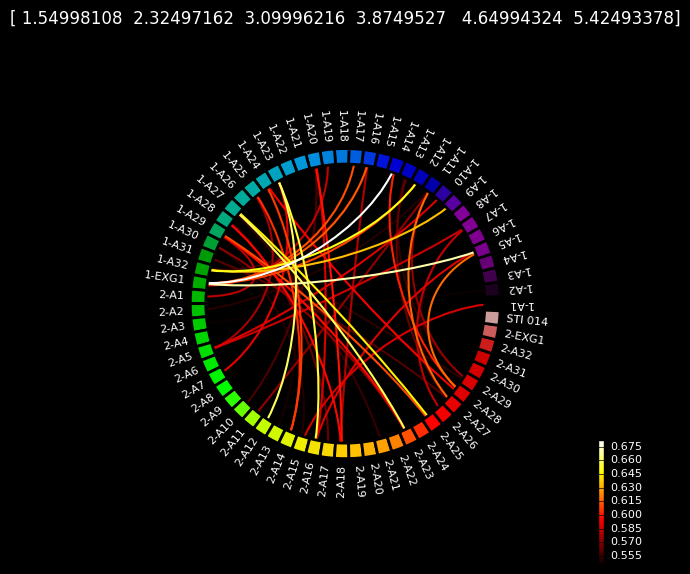

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 11.6Hz..15.5Hz (6 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    2.0s remaining:    7.3s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    4.2s remaining:    5.3s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    5.3s remaining:    2.6s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    6.1s finished


[array([ 11.62485809,  12.39984863,  13.17483917,  13.94982971,
        14.72482025,  15.49981079])]


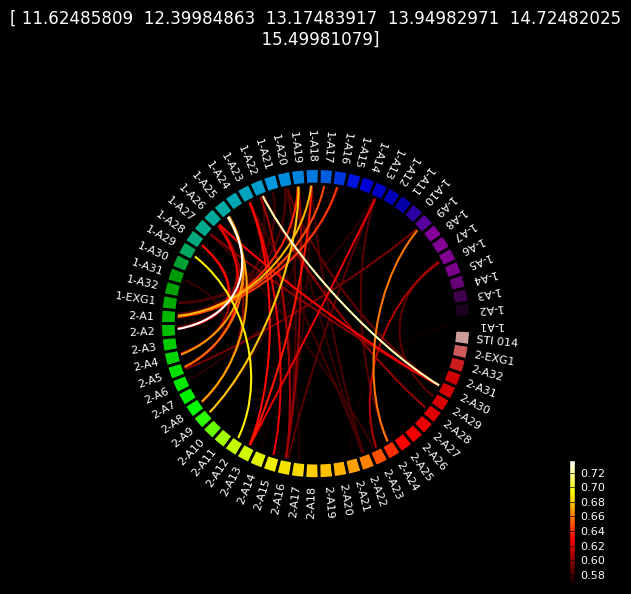

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 21.7Hz..25.6Hz (6 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    3.5s remaining:   12.6s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    5.0s remaining:    6.3s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    5.6s remaining:    2.8s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    7.1s finished


[array([ 21.69973511,  22.47472565,  23.24971619,  24.02470673,
        24.79969727,  25.57468781])]


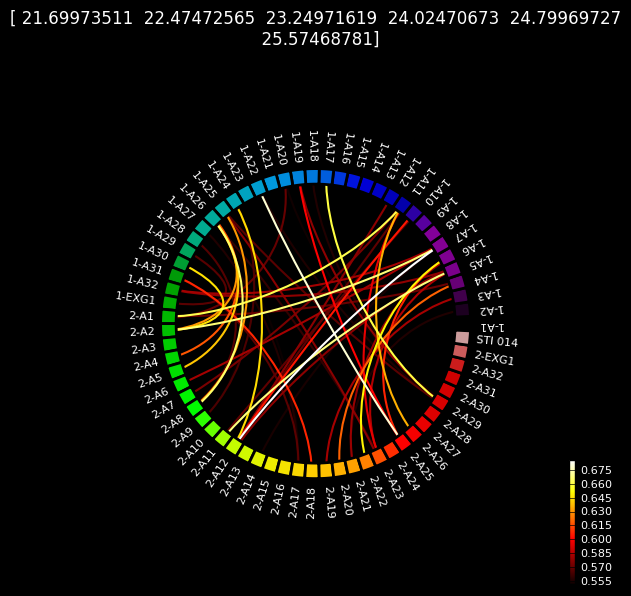

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 31.8Hz..35.6Hz (6 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    3.4s remaining:   12.2s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    4.4s remaining:    5.5s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    5.5s remaining:    2.7s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    6.5s finished


[array([ 31.77461213,  32.54960267,  33.32459321,  34.09958375,
        34.87457428,  35.64956482])]


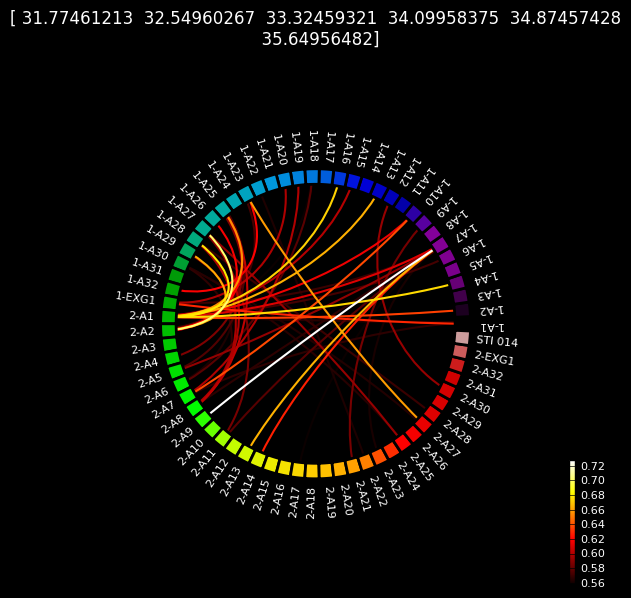

Connectivity computation...
    computing connectivity for 992 connections
    using t=0.000s..40.000s for estimation (81921 points)
    frequencies: 41.1Hz..45.7Hz (7 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..9


[Parallel(n_jobs=24)]: Done   2 out of   9 | elapsed:    4.1s remaining:   14.8s
[Parallel(n_jobs=24)]: Done   4 out of   9 | elapsed:    5.2s remaining:    6.5s
[Parallel(n_jobs=24)]: Done   6 out of   9 | elapsed:    6.0s remaining:    2.9s


[Connectivity computation done]


[Parallel(n_jobs=24)]: Done   9 out of   9 | elapsed:    7.2s finished


[array([ 41.0744986 ,  41.84948914,  42.62447968,  43.39947022,
        44.17446076,  44.9494513 ,  45.72444184])]


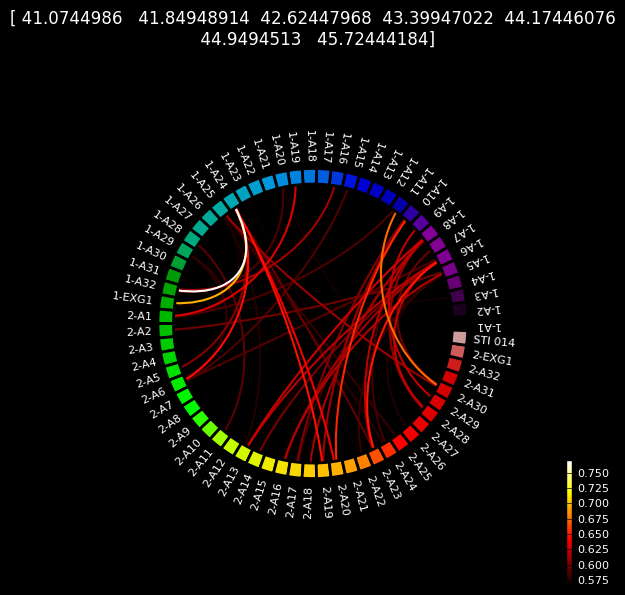

In [75]:
#con, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim, method='wpli', mode='fourier', fmax=49,fskip=10, faverage=False,block_size=120000, n_jobs=24)
#print freqs

for i in range(1,50,10):
    con, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim, indices=label_con,method='wpli', mode='fourier', fmin=i,fmax=i+5,fskip=30, faverage=True,block_size=120000, n_jobs=24)
    conmat = con[ :, 0]
    print freqs
    plot_connectivity_circle(conmat, label_names, indices=label_con,n_lines=50,linewidth=1.5,title='All-to-All Connectivity'.join(str(e) for e in freqs))